In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [2]:
# Importar dataset
df = pd.read_csv("/content/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
print(f"dataframe dimension: {df.shape}")

dataframe dimension: (150, 6)


In [10]:
print(df.groupby("Species").size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [11]:
df = df.drop(["Id"], axis=1)

Text(0, 0.5, 'quantidade')

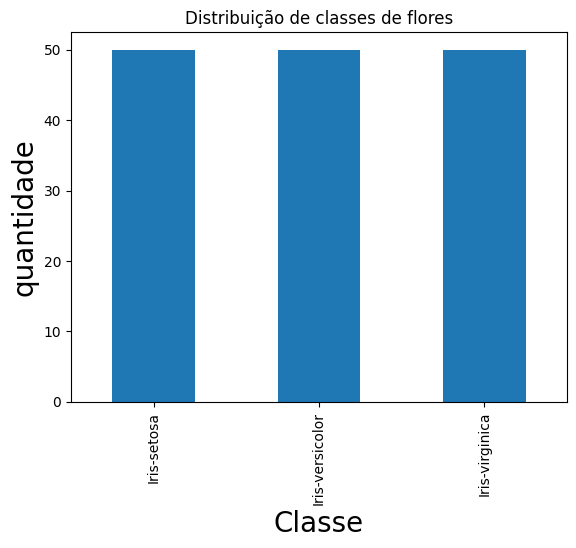

In [12]:
import matplotlib.pyplot as plt

nameplot = df["Species"].value_counts().plot.bar(title="Distribuição de classes de flores")
nameplot.set_xlabel("Classe", size=20)
nameplot.set_ylabel("quantidade", size=20)

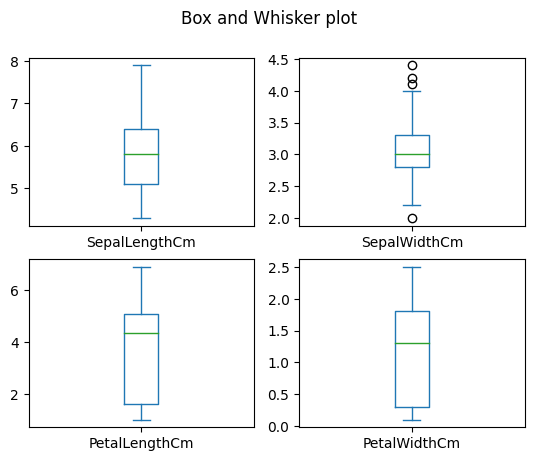

In [13]:
df.plot(kind='box', subplots=True, layout=(2,2),
        sharex=False, sharey=False, title="Box and Whisker plot")
plt.show();

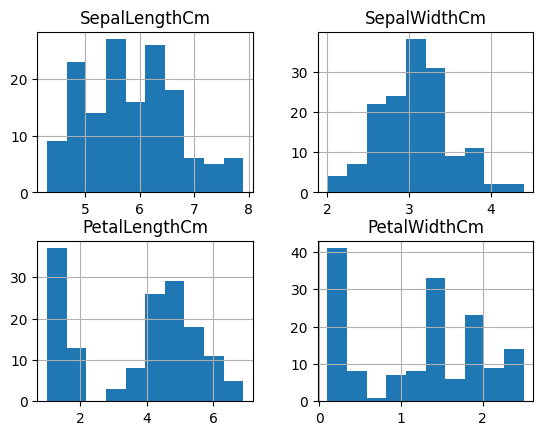

In [14]:
df.hist()
plt.show()

In [15]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [16]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: Species
Non-Null Count  Dtype 
--------------  ----- 
150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [18]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", y_train.shape)
print("Y_test.shape:", y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120,)
Y_test.shape: (30,)


In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit the encoder on the training target variable (learn the categories)
label_encoder.fit(y_train)

# Transform (encode) the training and testing target variables
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(y_train)
print(y_train_encoded)

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 120, dtype: object
[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


In [50]:
rf_pipeline = Pipeline(steps=[
    ("standarscaler", StandardScaler()),
    ("Normalizer", MinMaxScaler(feature_range=(0, 1))),
    ("RandomForestClassifier", RandomForestClassifier())
])

#lr_pipeline = Pipeline(steps=[
    #("standarscaler", StandardScaler()),
    #("LogisticRegression", LogisticRegression())
#])

svc_pipeline = Pipeline(steps=[
    ("standarscaler", StandardScaler()),
    ("Normalizer", MinMaxScaler(feature_range=(0, 1))),
    ("SVM", SVC() )
])

In [58]:
def test_model(model):
  model.fit(X_train, y_train_encoded)
  predictions = model.predict(X_test)

  # output model testing results
  print("Accuracy on cross_val_score:", cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='accuracy').mean() )
  print("Accuracy:", accuracy_score(y_test_encoded, predictions))
  print("Confusion Matrix:")
  print(confusion_matrix(y_test_encoded, predictions))
  print("Classification Report:")
  print(classification_report(y_test_encoded, predictions))

  cm = confusion_matrix(y_test_encoded, predictions)
  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.colorbar(shrink=0.5)
  plt.xticks(range(len(np.unique(y_test))), np.unique(y_test), rotation=45)
  plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.grid(False)
  plt.show()


RandomForestClassifier

Accuracy on cross_val_score: 0.9416666666666667
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



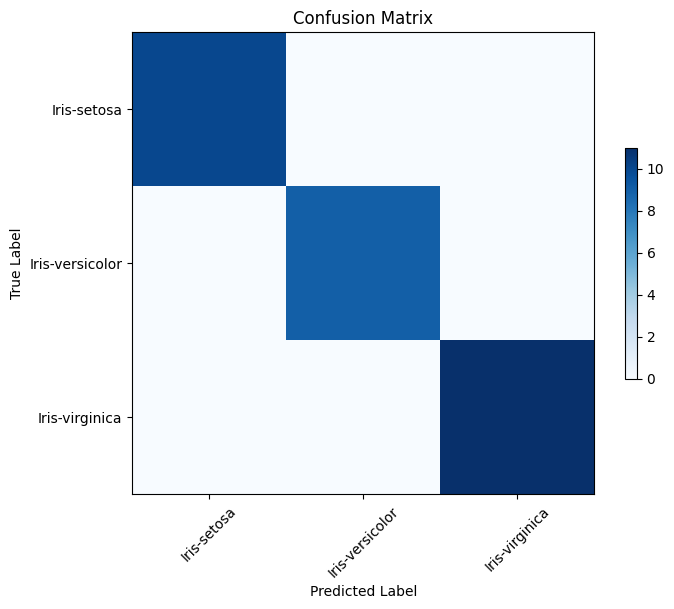


SVC

Accuracy on cross_val_score: 0.9583333333333334
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



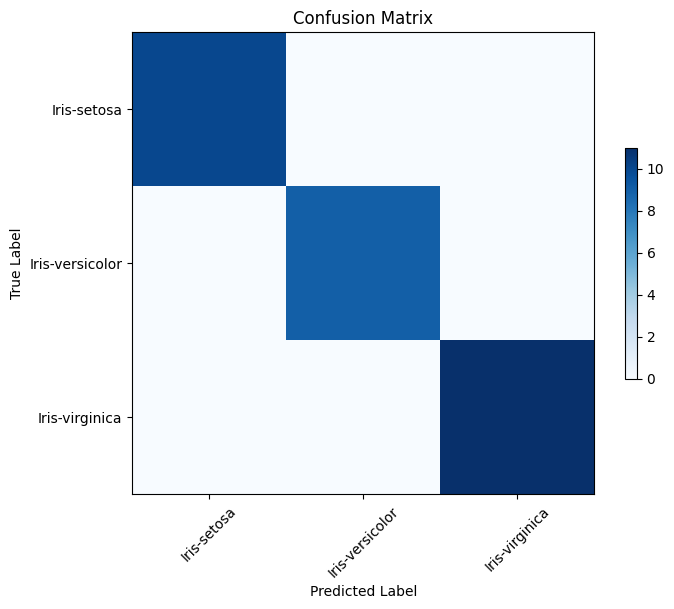

In [59]:
print("RandomForestClassifier\n")
test_model(rf_pipeline)
#print("\nLogisticRegression\n")
#test_model(lr_pipeline)
print("\nSVC\n")
test_model(svc_pipeline)